In [1]:
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
'''import scipy.integrate as integrate'''
import matplotlib.pyplot as plt
import matplotlib
import math
import statistics
import sys
import operator
import collections
import time
import pandas as pd

In [2]:
def Harvest_params(x,t,gam,om,xi,R,C):
    
    g=0.57
    
    #C = xi/kappa
    #R = kappa/lam/xi
    # Assigning symbols to elements of x for ease
    q = x[0] #q is first state
    p = x[1]
    v = x[2]
    Edrive = x[3]
    Ediss = x[4]
    
    # Renaming some parameters -- but this seems like a re-write, see 25 onwards
    # lam = 1/(R*C)
    # xi = C*(xi/C)
    #Symbolic equations of motion
    dqdt = p
    dpdt = -q**3+q + g*math.cos(om*t)-2*gam*p+xi*v
    dvdt = -v/(R*C)-(xi/C)*p
    #Some other time integrals we want to compute
    dEdrive_dt = g*math.cos(om*t)*p #energy absorbed from drive
    dEdiss_dt = 2*gam*p*p # energy disspated through Gamma
#    dEC = C*v*(-lam*v-(xi/C)*p) #energy in the capacitor
    dER = v*v/R #Energy in the resistor
#    dOsc = p*(-q * q * q +  q + g * math.cos(om * t) - 2 * gam * p + xi * v) + (
#                - q * q * q + q) * p # Energy IN the oscillator
    return [dqdt,dpdt,dvdt,dEdrive_dt,dEdiss_dt, dER]

In [3]:
#function which matches efficiency with resistance and omega. rewritten so that we can input the parameeters we want

def getEff(gam,om,xi,R,C):
    
    x0 = [1,0,0,0,0,0] #Initial values. Change here.
    totPoints = 100
    periods = 2
    pointPerPeroid = totPoints/periods

    t = np.linspace(0, periods*(2*math.pi)/om, totPoints)
    def Harvest(x,t):
        return Harvest_params(x,t,gam,om,xi,R,C)
        
    x=odeint(Harvest,x0,t)
    numOfPoints = 99 #This is the transient number of points to be rejected right here

    q = x[:,0][numOfPoints:] #Starting FROM numOfPoints
    p = x[:,1][numOfPoints:]
    v = x[:,2][numOfPoints:]
    Edrive = x[:,3][numOfPoints:]
    Ediss = x[:,4][numOfPoints:]
    # Ecap = x[:,5][600000:]
    ER = x[:,5][numOfPoints:]
    # EOsc = x[:,7][600000:]
    eff=(Edrive-Ediss)/Edrive
    return round(om,2), round(R,2), Ediss #returns omega, resistance, and E_diss

In [4]:
#getEff(gam, om,  xi,       R,     C)
getEff(0.02, 1,   0.05,    0.5,  0.25)

(1, 0.5, array([1.12824011]))

In [5]:
array_list=[]#compiling array of data
for om in range(15,25):
    for res in range(50,60):
        array_list.append(getEff(0.02, om*0.01, 0.05,  (10**-2)*res,      0.25))

In [6]:
len(array_list) #array of omega, resitance, and efficiencies for varying values of om and R

100

In [7]:
updated_array=[]
for i in array_list:
    if i not in updated_array:
        updated_array.append(i)
        

In [8]:
e_diss_vals=[]
om_vals=[]
res_vals=[]
for i in array_list: #compiling results into separate lists for plotting
    e_diss_vals.append(float(i[2]))
for i in array_list:
    om_vals.append(float(i[0]))
for i in array_list:
    res_vals.append(float(i[1]))
len_sqrt=int(len(array_list)**0.5)#setting legth of each column    
e_diss_array=np.array([e_diss_vals[i:i+len_sqrt] for i in range(0, 100, len_sqrt)]) #separating rows into column corresponding to R and w
om_array=np.array([om_vals[i:i+len_sqrt] for i in range(0, 100, len_sqrt)]) 
res_array=np.array([res_vals[i:i+len_sqrt] for i in range(0, 100, len_sqrt)]) 

In [10]:
e_diss_array

array([[1.2137254 , 1.21031351, 1.20646822, 1.20249095, 1.19866343,
        1.19531312, 1.19267764, 1.19094035, 1.1901865 , 1.19042701],
       [1.04153704, 1.0414489 , 1.04135458, 1.04125199, 1.04114097,
        1.0410198 , 1.0408872 , 1.04074222, 1.04058307, 1.04040897],
       [1.06386664, 1.06370122, 1.06353537, 1.06337407, 1.063213  ,
        1.06305423, 1.06289628, 1.06273963, 1.06258372, 1.06243066],
       [1.02497082, 1.02772746, 1.02625206, 1.01759977, 1.00367329,
        0.99077377, 0.98397508, 0.98244188, 0.89092556, 0.86292941],
       [0.88597223, 0.88592535, 0.88587838, 0.88583155, 0.88578467,
        0.88573773, 0.88569105, 0.88564447, 0.88559805, 0.88555155],
       [0.84434392, 0.84463499, 0.84493094, 0.84523262, 0.84553607,
        0.84584389, 0.84615543, 0.84646915, 0.84678397, 0.84710105],
       [1.0761027 , 1.0754986 , 1.07490046, 1.07430626, 1.07371331,
        1.07312495, 1.07254061, 1.07195979, 1.07138246, 1.07080682],
       [0.66153152, 0.66166218, 0.6617944

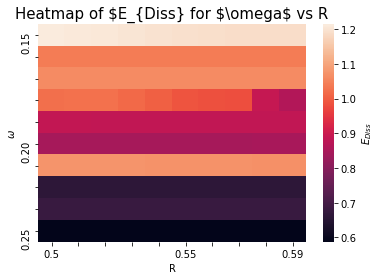

In [13]:
h=sns.heatmap(e_diss_array,cbar_kws={'label': '$E_{Diss}$'})
h.set_yticklabels(['0.15','','','','','0.20','','','','0.25'])
h.set_xticklabels(['0.5','','','','','0.55','','','','0.59'])
h.set_xlabel("R", fontsize = 10)
h.set_ylabel("$\omega$", fontsize = 10)
h.set_title("Heatmap of $E_{Diss} for $\omega$ vs R", fontsize=15)
plt.savefig("heatmap_ediss.png")